## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import sklearn library
import sklearn.datasets as datasets
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder,LabelBinarizer,StandardScaler

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
%cd '/content/drive/My Drive/Dibimbing'

/content/drive/My Drive/Dibimbing


In [ ]:
!ls

'Day 20'  'Day 22'				      heart_failure.csv
'Day 21'  'Dea Gloria - Final Project Script.ipynb'   __pycache__


## Reading the Data

In [ ]:
data = pd.read_csv("heart_failure.csv")

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.shape

(299, 13)

### Column Explanation:
1. age: the person's current age
2. anaemia: whether the person has decrease of red blood cells or hemoglobin (0 for no, 1 for yes)
3. creatinine_phosphokinase: level of CPK enzyme in the blood (mcg/L)
4. diabetes: whether the person has diabetes (0 for no, 1 for yes)
5. ejection_fraction: percentage of blood leaving the heart at each contraction
6. high_blood_pressure: whether the person has hipertension (0 for no, 1 for yes)
7. platelets: platelets in the blood (kiloplatelets/mL)
8. serum_creatinine: level of serum creatinine in the blood (mg/dL)
9. serum_sodium: level of serum sodium in the blood (mEq/L)
10. sex: 0 for women, 1 for men
11. smoking: whether the person is smoking (0 for no, 1 for yes)
12. time: follow up period (in days)
13. death_event: whether the person deceased during the follow-up period (boolean)

## Exploratory Data Analysis

In [ ]:
# No null values
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Changing data types
data['anaemia'] = data['anaemia'].astype('category')
data['diabetes'] = data['diabetes'].astype('category')
data['high_blood_pressure'] = data['high_blood_pressure'].astype('category')
data['sex'] = data['sex'].astype('category')
data['smoking'] = data['smoking'].astype('category')
data['DEATH_EVENT'] = data['DEATH_EVENT'].astype('category')
data['age'] = data['age'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    int64   
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(2), int64(5)
memory usage:

In [ ]:
numeric_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
data[numeric_columns].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


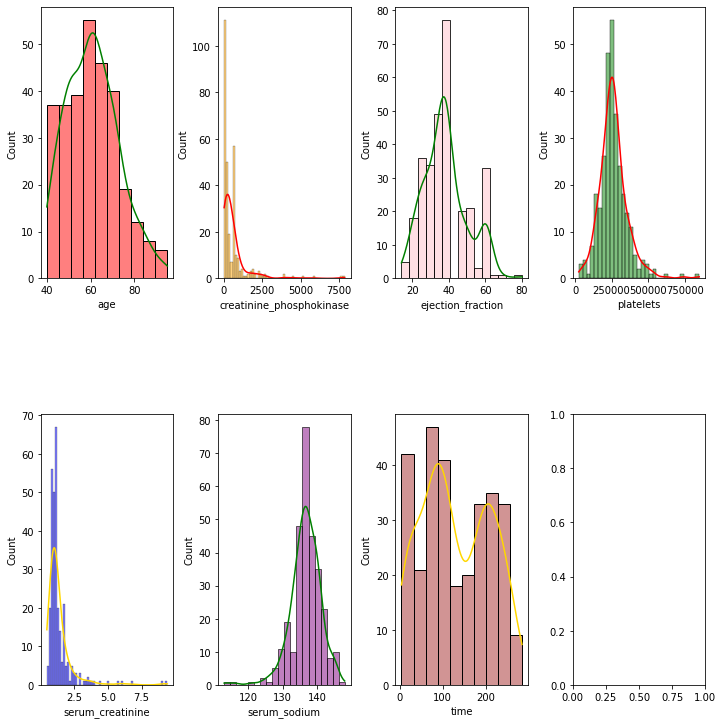

In [ ]:
# Checking numerical data distribution
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
fig.tight_layout()

age_dist = sns.histplot(data, x="age", kde=True, color='red',ax=axes[0, 0])
cp_dist = sns.histplot(data, x="creatinine_phosphokinase", kde=True, color='orange',ax=axes[0, 1])
ejection_dist = sns.histplot(data, x="ejection_fraction", kde=True, color='pink',ax=axes[0, 2])
platelets_dist = sns.histplot(data, x="platelets", kde=True, color='green',ax=axes[0, 3])
sc_dist = sns.histplot(data, x="serum_creatinine", kde=True, color='blue',ax=axes[1, 0])
ss_dist = sns.histplot(data, x="serum_sodium", kde=True, color='purple',ax=axes[1, 1])
time_dist = sns.histplot(data, x="time", kde=True, color='brown',ax=axes[1, 2])

plt.subplots_adjust(hspace = 0.5)
age_dist.lines[0].set_color('green')
cp_dist.lines[0].set_color('red')
ejection_dist.lines[0].set_color('green')
platelets_dist.lines[0].set_color('red')
sc_dist.lines[0].set_color('gold')
ss_dist.lines[0].set_color('green')
time_dist.lines[0].set_color('gold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


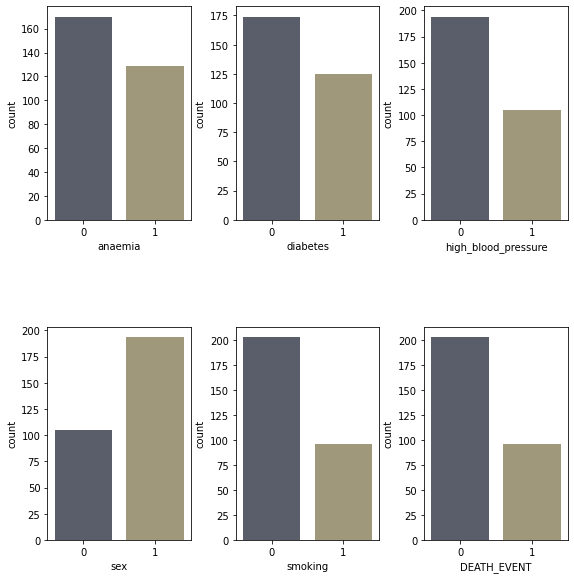

In [ ]:
# Checking categorical column counts
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
fig.tight_layout()

anaemia_count = sns.countplot(data['anaemia'], palette = 'cividis', ax=axes[0, 0])
diabetes_count = sns.countplot(data['diabetes'], palette = 'cividis', ax=axes[0, 1])
hbp_count = sns.countplot(data['high_blood_pressure'], palette = 'cividis', ax=axes[0, 2])
sex_count = sns.countplot(data['sex'], palette = 'cividis', ax=axes[1, 0])
smoking_count = sns.countplot(data['smoking'], palette = 'cividis', ax=axes[1, 1])
target_count = sns.countplot(data['DEATH_EVENT'], palette = 'cividis', ax=axes[1, 2])

plt.subplots_adjust(hspace = 0.5)

## Finding & Removing Outliers

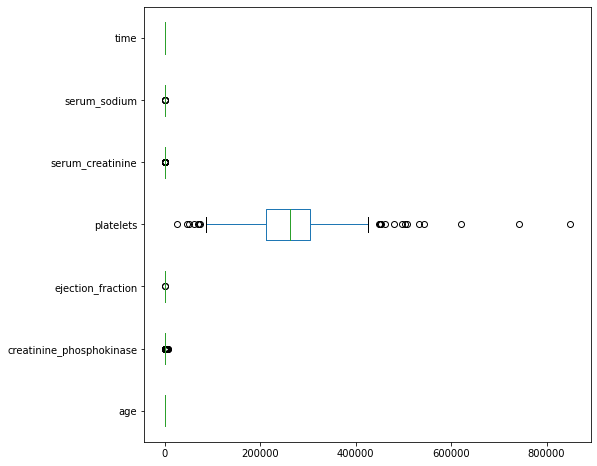

In [ ]:
# Creating boxplot to check for outliers
data.boxplot(column=numeric_columns,fontsize=10,rot=0,grid=False,figsize=(8,8),vert=False)

In [ ]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 age                             51.0
creatinine_phosphokinase       116.5
ejection_fraction               30.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
time                            73.0
Name: 0.25, dtype: float64

Q3:
 age                             70.0
creatinine_phosphokinase       582.0
ejection_fraction               45.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
time                           203.0
Name: 0.75, dtype: float64

IQR:
 age                            19.0
creatinine_phosphokinase      465.5
ejection_fraction              15.0
platelets                   91000.0
serum_creatinine                0.5
serum_sodium                    6.0
time                          130.0
dtype: float64

Min:
 age                            22.50
creatinine_phosphokinase     -581.75
ejection_fraction               7.50
platelets                

In [ ]:
# Removing outliers
for x in numeric_columns:
  filter_min = data[x]<boxplot_min[x]
  filter_max = data[x]>boxplot_max[x]
  data = data[~(
    filter_min|filter_max
    )]

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


In [ ]:
data.shape

(224, 13)

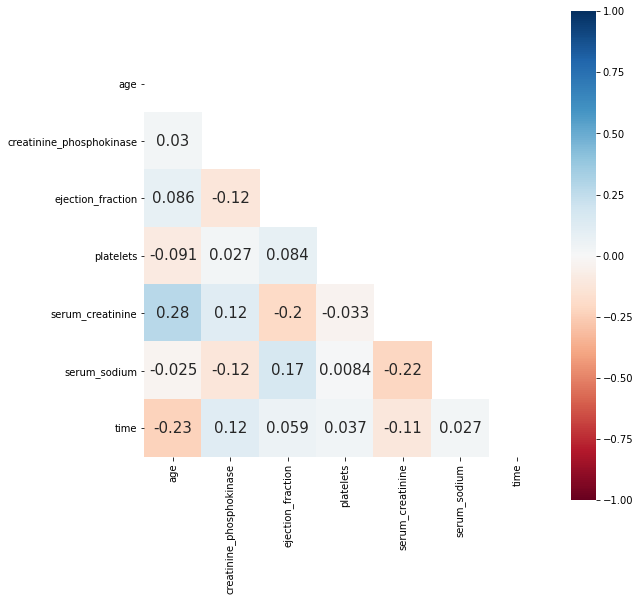

In [ ]:
# Checking correlation between columns

correlation_between_column = data.corr()
upper_triangle_corr = np.triu(correlation_between_column)

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(correlation_between_column, annot = True, cmap = "RdBu",vmax = 1.0, vmin= -1.0, ax = ax, annot_kws = {"size":15}, mask = upper_triangle_corr, square = True)

## Data Preprocessing

In [ ]:
# Splitting features and target
selected = ['age', 'serum_creatinine', 'time']
x = data[selected]
y = data['DEATH_EVENT']

In [ ]:
# Split the data into train and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,
    y,
    train_size=0.8,
    random_state=7
    )

In [ ]:
# Checking the data shape
print('Shape Data x Train:')
print(x_train.shape)
print('\nShape Data x Test:')
print(x_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data x Train:
(179, 3)

Shape Data x Test:
(45, 3)

Shape Data y Train:
(179,)

Shape Data y Test:
(45,)


In [ ]:
# Standardizing both train and test data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Machine Learning Modelling

## Logistic Regression

In [ ]:
# Load the algorithm
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Train the data
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predict using the trained model
y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)
target_pred = logreg.predict(x)

In [ ]:
# Comparing prediction with real data
print('Real Data')
print(y_train[:5])
print('Predicted Data')
print(y_train_pred[:5])

Real Data
83     0
274    0
190    0
140    1
21     1
Name: DEATH_EVENT, dtype: category
Categories (2, int64): [0, 1]
Predicted Data
[1 0 0 0 1]


In [ ]:
# Evaluate model's accuracy
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Accuracy Training Data: 0.8715083798882681
Accuracy Test Data: 0.8888888888888888


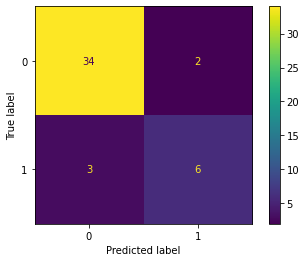

In [ ]:
# Create a confusion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, x_test, y_test)

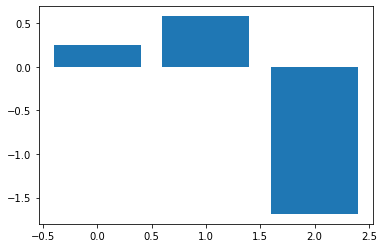

Feature: 0, Score: 0.253
Feature: 1, Score: 0.579
Feature: 2, Score: -1.688


In [ ]:
# Feature importance
fi_logreg = logreg.coef_[0]
 
# Plotting feature importance
plt.bar([x for x in range(len(fi_logreg))], fi_logreg)
plt.show()

# Summarizing feature importance
for i,v in enumerate(fi_logreg):
	print('Feature: %0d, Score: %.3f' % (i,v))


# The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0

## Naive Bayes

In [ ]:
# Load the algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict using the trained model
y_train_pred = nb.predict(x_train)
y_test_pred = nb.predict(x_test)
target_pred = nb.predict(x)

In [ ]:
# Compare prediction and real data
print('Real Data')
print(y_train[:5])
print('Predicted Data')
print(y_train_pred[:5])

Real Data
83     0
274    0
190    0
140    1
21     1
Name: DEATH_EVENT, dtype: category
Categories (2, int64): [0, 1]
Predicted Data
[1 0 1 1 1]


In [ ]:
# Evaluate the model
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Accuracy Training Data: 0.8603351955307262
Accuracy Test Data: 0.8666666666666667


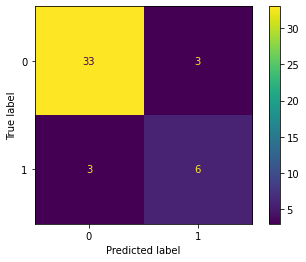

In [ ]:
# Confusion matrix
plot_confusion_matrix(nb, x_test, y_test)

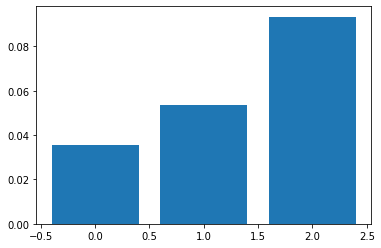

Feature: 0, Score: 0.036
Feature: 1, Score: 0.053
Feature: 2, Score: 0.093


In [ ]:
# Feature importance
from sklearn.inspection import permutation_importance
fi_nb = permutation_importance(nb, x_test, y_test)

# Plotting feature importance
plt.bar([x for x in range(len(fi_nb.importances_mean))], fi_nb.importances_mean)
plt.show()

# Summarizing feature importance
for i,v in enumerate(fi_nb.importances_mean):
	print('Feature: %0d, Score: %.3f' % (i,v))

## Decision Tree

In [ ]:
# Load the algorithm
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predict using the trained model
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)
target_pred = dt.predict(x)

In [ ]:
# Compare prediction and real data
print('Real Data')
print(y_train[:5])
print('Predicted Data')
print(y_train_pred[:5])

Real Data
83     0
274    0
190    0
140    1
21     1
Name: DEATH_EVENT, dtype: category
Categories (2, int64): [0, 1]
Predicted Data
[0 0 0 1 1]


In [ ]:
# Evaluate the model
# Overfit
accuracy_training = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print(f'Accuracy Training Data: {accuracy_training}')
print(f'Accuracy Test Data: {accuracy_test}')

Accuracy Training Data: 1.0
Accuracy Test Data: 0.8


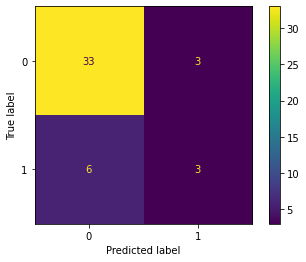

In [ ]:
plot_confusion_matrix(dt, x_test, y_test)

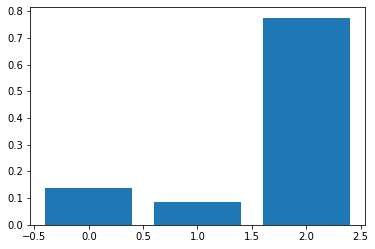

Feature: 0, Score: 0.138
Feature: 1, Score: 0.087
Feature: 2, Score: 0.775


In [ ]:
# Feature importance
fi_dt = dt.feature_importances_

# Plotting feature importance
plt.bar([x for x in range(len(fi_dt))], fi_dt)
plt.show()

# Summarize feature importance
for i,v in enumerate(fi_dt):
	print('Feature: %0d, Score: %.3f' % (i,v))